# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





# Loading the dataset and libraries

In [ ]:
# Importing some important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting my drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Converting the data into pandas datframe
df=pd.read_csv('/content/drive/MyDrive/Superstore Marketing Data - Sheet1.csv')
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
df.tail()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,########,99,169,...,188,0,144,1,8,5,4,7,1,0


# Basic idea about the dataset

In [ ]:
df.shape

(2240, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Year_Birth'].unique()

array([1970, 1961, 1958, 1967, 1989, 1954, 1947, 1979, 1959, 1981, 1969,
       1977, 1960, 1966, 1976, 1965, 1956, 1975, 1971, 1986, 1972, 1974,
       1990, 1987, 1984, 1968, 1955, 1983, 1973, 1978, 1952, 1962, 1964,
       1982, 1963, 1957, 1980, 1945, 1949, 1948, 1953, 1946, 1985, 1992,
       1944, 1951, 1988, 1950, 1994, 1993, 1991, 1893, 1996, 1995, 1899,
       1943, 1941, 1940, 1900])

In [ ]:
df['Dt_Customer'].unique()

array(['6/16/2014', '6/15/2014', '5/13/2014', '########', '3/17/2014',
       '1/29/2014', '1/18/2014', '12/27/2013', '10/16/2013', '7/23/2013',
       '5/28/2013', '3/26/2013', '3/15/2013', '11/23/2012', '10/13/2012',
       '9/14/2012', '6/29/2014', '5/31/2014', '5/30/2014', '4/27/2014',
       '10/29/2013', '4/25/2013', '4/20/2013', '3/30/2013', '2/14/2013',
       '12/19/2012', '12/15/2012', '9/17/2012', '4/28/2014', '3/29/2014',
       '11/15/2013', '9/20/2013', '8/31/2013', '7/30/2013', '7/27/2013',
       '6/22/2013', '11/21/2012', '9/28/2012', '9/27/2012', '8/13/2012',
       '6/25/2014', '5/28/2014', '4/14/2014', '2/27/2014', '1/28/2014',
       '11/17/2013', '10/17/2013', '10/13/2013', '9/30/2013', '5/29/2013',
       '4/29/2013', '10/18/2012', '8/26/2012', '5/23/2014', '5/17/2014',
       '4/21/2014', '3/23/2014', '12/16/2013', '11/26/2013', '11/14/2013',
       '9/27/2013', '9/18/2013', '7/18/2013', '5/27/2013', '2/20/2013',
       '12/24/2012', '11/19/2012', '3/28/2014', '

In [ ]:
# Checking rows containing values in Dt_Customer is '########'
df[df['Dt_Customer']=='########']

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0
8,4047,1954,PhD,Married,65324.0,0,1,########,0,384,...,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,########,0,384,...,21,32,5,3,6,2,9,4,0,0
11,5642,1979,Master,Together,62499.0,1,0,########,0,140,...,0,13,4,2,3,1,6,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,8595,1973,Graduation,Widow,42429.0,0,1,########,99,55,...,2,0,4,2,1,1,3,5,0,0
2232,7232,1973,Graduation,Widow,42429.0,0,1,########,99,55,...,2,0,4,2,1,1,3,5,0,0
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0


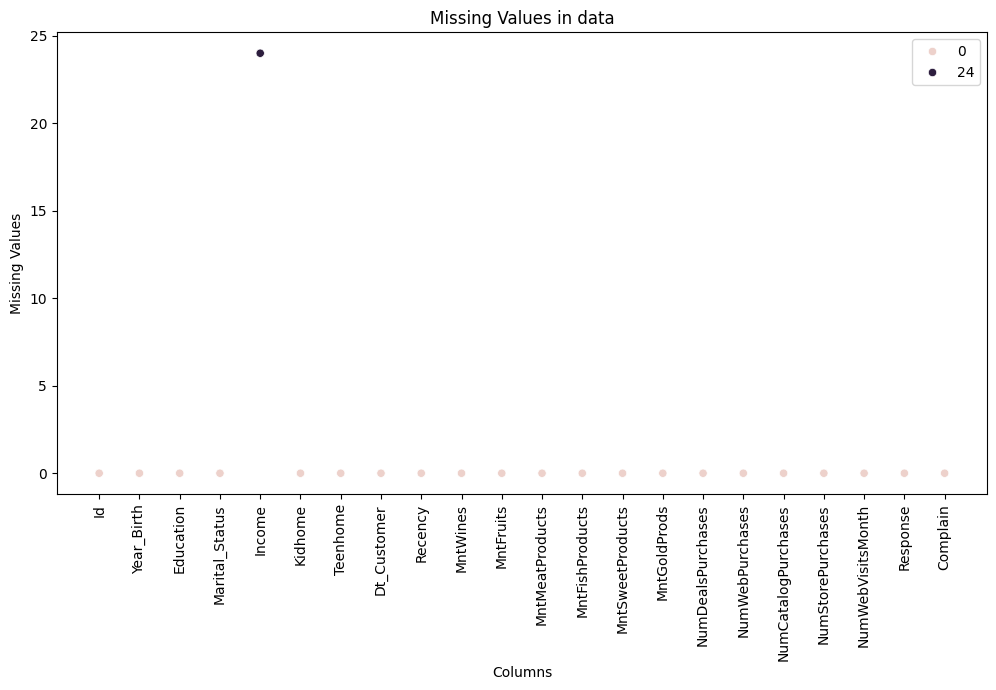

In [ ]:
# Visualizing the missing values
missing_values=df.isnull().sum()
plt.figure(figsize=(12, 6))
sns.scatterplot(x=missing_values.index,y=missing_values.values,color='voilet',hue=missing_values.values)
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.xticks(rotation=90)
plt.title('Missing Values in data')
plt.show()


In [ ]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

# Clean and preprocess the dataset

**Handling Null Values**

Previously we observed that the Income column contains the null items. So, lets visualize the centram tendencies and spread of the data in Income column.

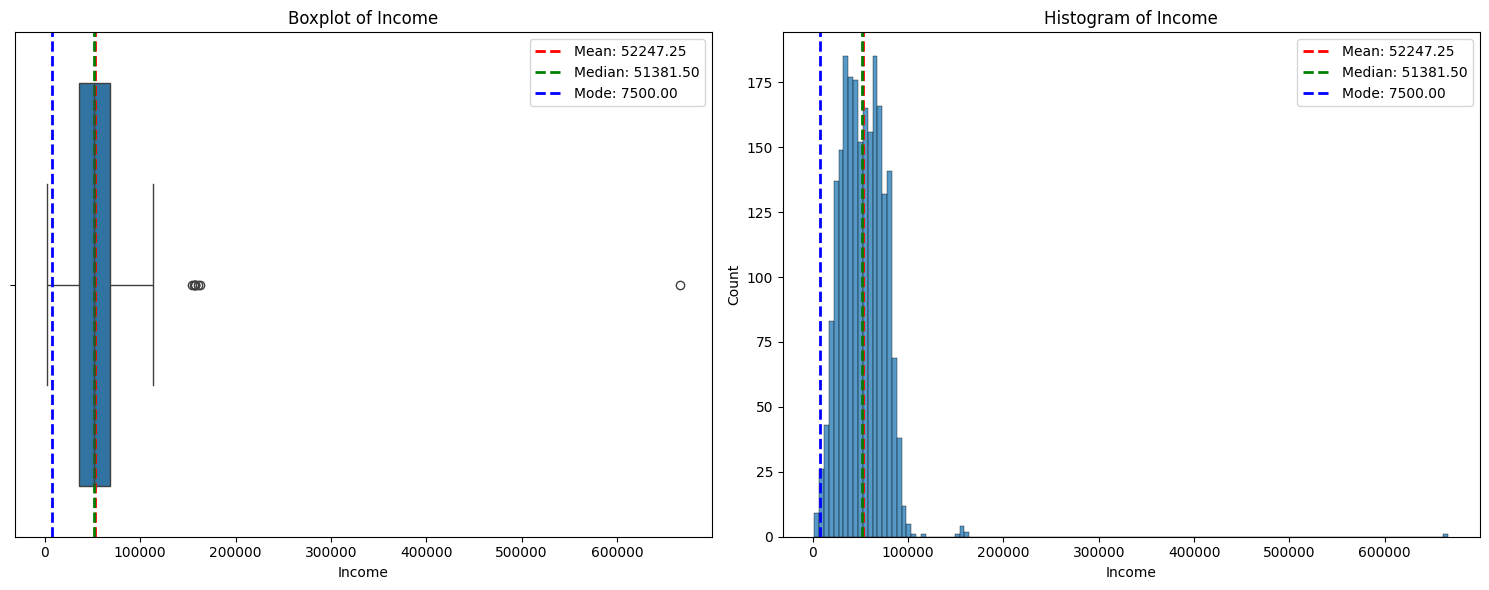

In [ ]:
plt.figure(figsize=(15, 6))

# Subplot 1: Boxplot with Legend
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Income'])
plt.title('Boxplot of Income')

# Calculate and plot central tendency lines
mean_line = plt.axvline(df['Income'].mean(), color='red', linestyle='dashed', linewidth=2)
median_line = plt.axvline(df['Income'].median(), color='green', linestyle='dashed', linewidth=2)
mode_line = plt.axvline(df['Income'].mode()[0], color='blue', linestyle='dashed', linewidth=2)

# Add legend to boxplot with values
plt.legend([mean_line, median_line, mode_line],
           [f'Mean: {df["Income"].mean():.2f}',
            f'Median: {df["Income"].median():.2f}',
            f'Mode: {df["Income"].mode()[0]:.2f}'])

# Subplot 2: Histogram with Legend
plt.subplot(1, 2, 2)
sns.histplot(df['Income'])
plt.title('Histogram of Income')

# Calculate and plot central tendency lines
mean_line = plt.axvline(df['Income'].mean(), color='red', linestyle='dashed', linewidth=2)
median_line = plt.axvline(df['Income'].median(), color='green', linestyle='dashed', linewidth=2)
mode_line = plt.axvline(df['Income'].mode()[0], color='blue', linestyle='dashed', linewidth=2)

# Add legend to histogram with values
plt.legend([mean_line, median_line, mode_line],
           [f'Mean: {df["Income"].mean():.2f}',
            f'Median: {df["Income"].median():.2f}',
            f'Mode: {df["Income"].mode()[0]:.2f}'])

plt.tight_layout()
plt.show()

Now Check the rows containing null values.

In [ ]:
null_rows=df[df['Income'].isnull()]
null_rows

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
134,8996,1957,PhD,Married,NaN,2,1,11/19/2012,4,230,...,49,37,53,12,7,2,8,9,0,0
262,1994,1983,Graduation,Married,NaN,1,0,11/15/2013,11,5,...,0,2,1,1,1,0,2,7,0,0
394,3769,1972,PhD,Together,NaN,1,0,########,17,25,...,0,0,3,1,1,0,3,7,0,0
449,5255,1986,Graduation,Single,NaN,1,0,2/20/2013,19,5,...,3,263,362,0,27,0,0,1,0,0
525,8268,1961,PhD,Married,NaN,0,1,########,23,352,...,10,0,15,3,6,1,7,6,0,0
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/2012,25,25,...,17,4,17,3,3,0,3,8,0,0
899,10475,1970,Master,Together,NaN,0,1,########,39,187,...,26,20,14,2,4,2,6,5,0,0
997,9235,1957,Graduation,Single,NaN,1,1,5/27/2014,45,7,...,2,0,1,1,1,0,2,7,0,0
1096,4345,1964,2n Cycle,Single,NaN,1,1,########,49,5,...,2,0,4,1,1,0,2,7,0,0
1185,7187,1969,Master,Together,NaN,1,1,5/18/2013,52,375,...,94,66,96,7,4,10,4,3,0,0


Here we can clearly see the the amounts spends in different product categories are not null. So, lets check the ration between the total amount spent and income in the dataset.

In [ ]:
# Creating a dataframe containing the id and total purchase amount,income,purchase income ratio
df1=df[['Id','Income']]
# Adding a column name Total purchase amount
df1['Total_Purchase_Amount']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df1['Purchase_income_ratio']=df1['Total_Purchase_Amount']/df1['Income']
df1.head()

,Id,Income,Total_Purchase_Amount,Purchase_income_ratio
0,1826,84835.0,1190,0.014027
1,1,57091.0,577,0.010107
2,10476,67267.0,251,0.003731
3,1386,32474.0,11,0.000339
4,5371,21474.0,91,0.004238


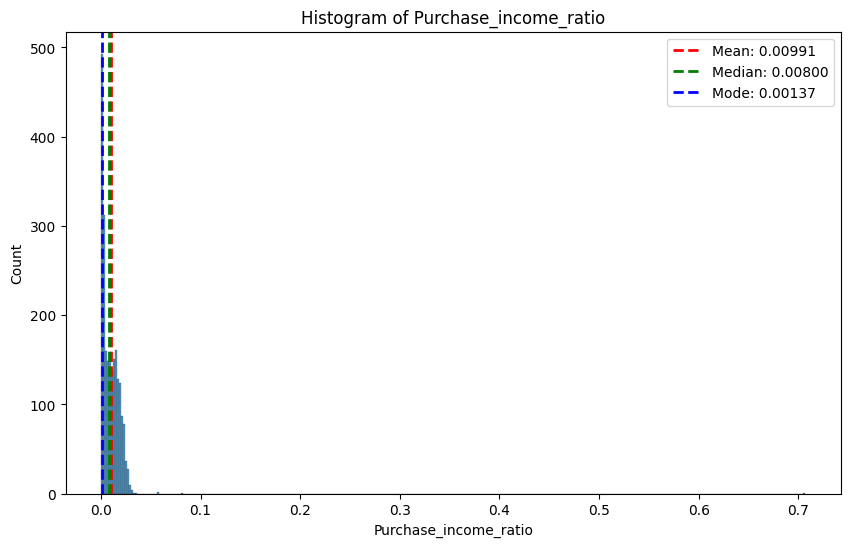

In [ ]:
# Visualizing the Purchase_income_ratio in histogram along with marking central tendencies.
plt.figure(figsize=(10, 6))
sns.histplot(df1['Purchase_income_ratio'])
plt.title('Histogram of Purchase_income_ratio')
plt.axvline(df1['Purchase_income_ratio'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(df1['Purchase_income_ratio'].median(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(df1['Purchase_income_ratio'].mode()[0], color='blue', linestyle='dashed', linewidth=2)
plt.legend([f'Mean: {df1["Purchase_income_ratio"].mean():.5f}',
            f'Median: {df1["Purchase_income_ratio"].median():.5f}',
            f'Mode: {df1["Purchase_income_ratio"].mode()[0]:.5f}'])
plt.show()

In [ ]:
# Creating an Function which fill the null values in df['Income'] with df1['Total_Purchase_Amount']/ mean value of df1['Purchase_income_ratio'].
def fill_income(row):
    if pd.notna(row['Income']):
        return row['Income']
    else:
        # Calculate Total_Purchase_Amount within the function
        total_purchase = row['MntWines'] + row['MntFruits'] + row['MntMeatProducts'] + \
                         row['MntFishProducts'] + row['MntSweetProducts'] + row['MntGoldProds']
        return total_purchase / 0.00991

# Apply the function to the DataFrame
df['Income'] = df.apply(fill_income, axis=1)
df.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


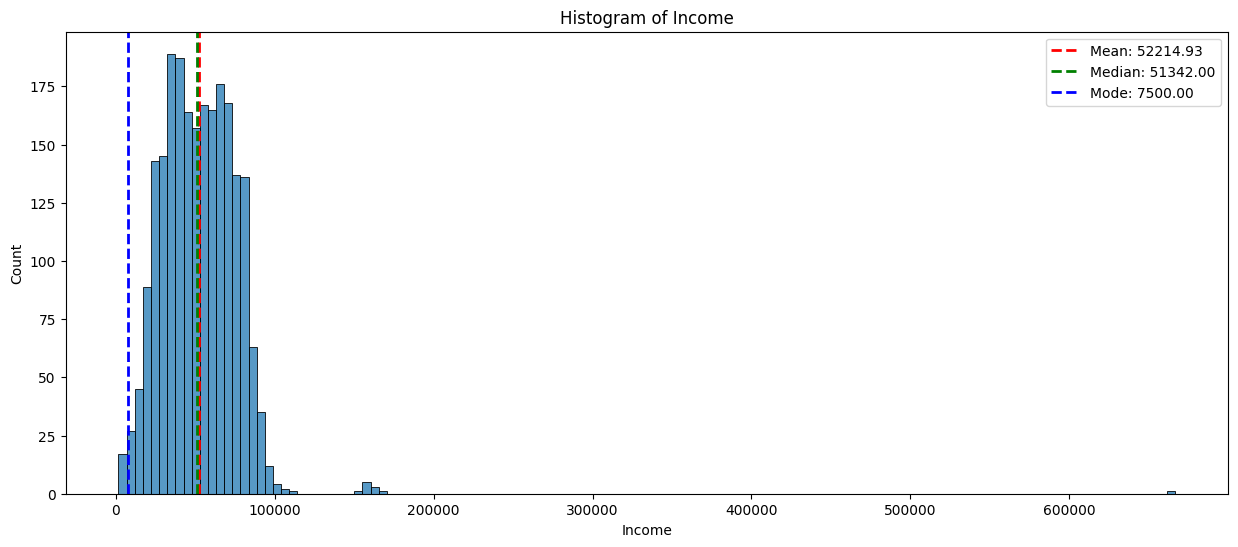

In [ ]:
# VIsualizing the Income column
plt.figure(figsize=(15, 6))
sns.histplot(df['Income'])
plt.title('Histogram of Income')
plt.axvline(df['Income'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(df['Income'].median(), color='green', linestyle='dashed', linewidth=2)
plt.axvline(df['Income'].mode()[0], color='blue', linestyle='dashed', linewidth=2)
plt.legend([f'Mean: {df["Income"].mean():.2f}',
            f'Median: {df["Income"].median():.2f}',
            f'Mode: {df["Income"].mode()[0]:.2f}'])
plt.show()

All the column seems to contains the relevant datatypes expect two columns named Year_Birth and Dt_Customer.
Also Dt_Customer also containing some '########' values which needs to be treated properly.

In [ ]:
# Converting the values of Year_Birth column to datetime datatype.
df['Year_Birth']=pd.to_datetime(df['Year_Birth'],format='%Y')

In [ ]:
# Replace '########' with NaT
df['Dt_Customer'] = df['Dt_Customer'].replace('########', pd.NaT)

# Convert the column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

Check for Duplicates

In [ ]:
# Checking duplicates
df.duplicated().sum()

0

## **Analyze the distribution of customer demographics**

Age Descriptive Statistics:
 count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64


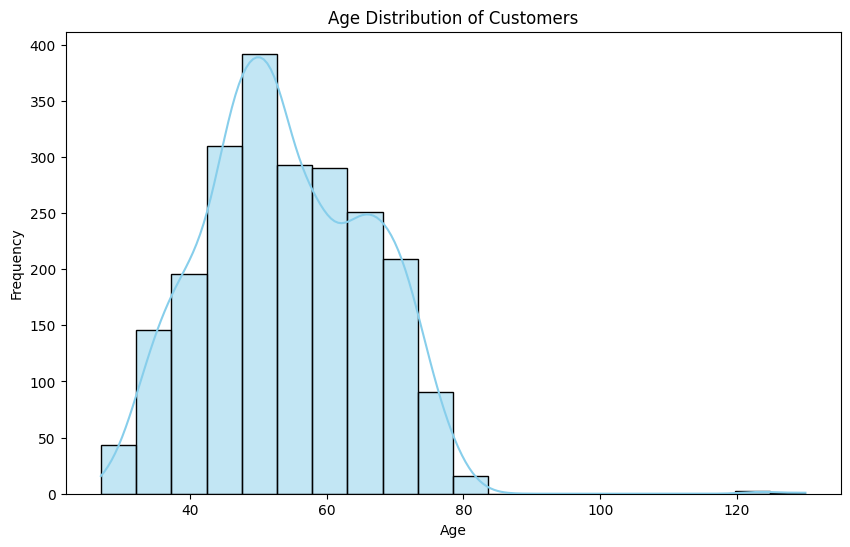

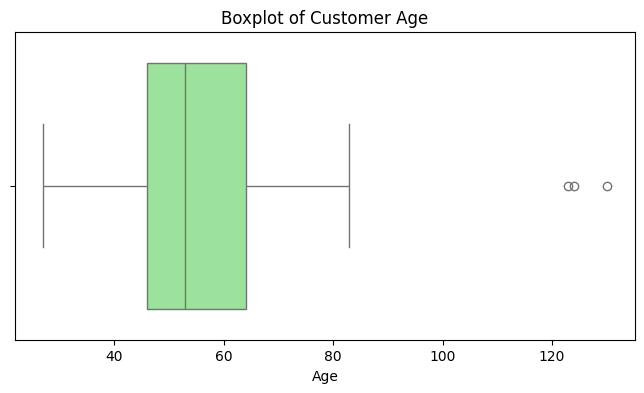

In [ ]:
# Calculate Age from Year_Birth
df['Age'] = 2023 - pd.to_numeric(df['Year_Birth'].dt.year)

# Descriptive statistics for Age
age_stats = df['Age'].describe()
print("Age Descriptive Statistics:\n", age_stats)

# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Boxplot for Age
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'], color='lightgreen')
plt.title("Boxplot of Customer Age")
plt.xlabel("Age")
plt.show()


In [ ]:
# Removing the data having age more than 100
df=df[df['Age']<100]
df['Age'].describe()

,Age
count,2237.000000
mean,54.098346
std,11.701917
min,27.000000
25%,46.000000
50%,53.000000
75%,64.000000
max,83.000000


**Analyze and Visualize the Education Distribution**

Education Level Counts:
 Education
Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64


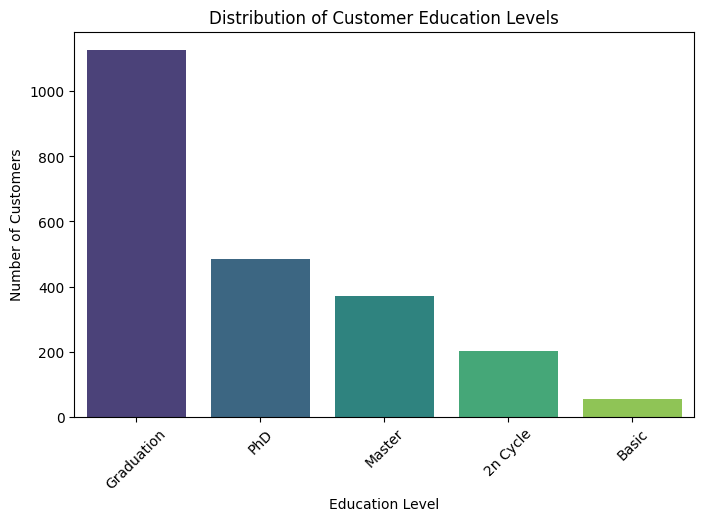

In [ ]:
# Count unique values for Education
education_counts = df['Education'].value_counts()
print("Education Level Counts:\n", education_counts)

# Bar plot for Education
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Education', palette='viridis', order=education_counts.index)
plt.title("Distribution of Customer Education Levels")
plt.xlabel("Education Level")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Adding Education to the df1 to get the total purchases amount in each departments.
df1['Education'] = df['Education']
Total_purchase_by_education = df1.groupby('Education')['Total_Purchase_Amount'].sum()

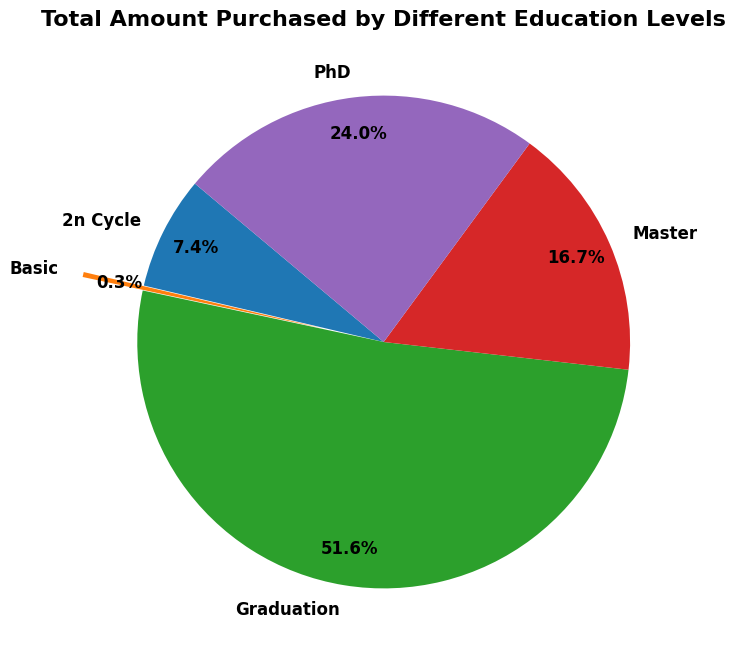

In [ ]:
plt.figure(figsize=(15, 8))
explode = (0, 0.25, 0, 0, 0)  # Explode the first slice
textprops = {'fontsize': 12, 'weight': 'bold'}
plt.pie(Total_purchase_by_education, labels=Total_purchase_by_education.index,
        autopct='%1.1f%%', startangle=140, explode=explode,
        textprops=textprops, pctdistance=0.85, labeldistance=1.1)
plt.title('Total Amount Purchased by Different Education Levels', fontsize=16, fontweight='bold')
plt.show()

**Analyze and Visualize the Marital Status Distribution**

Marital Status Counts:
 Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


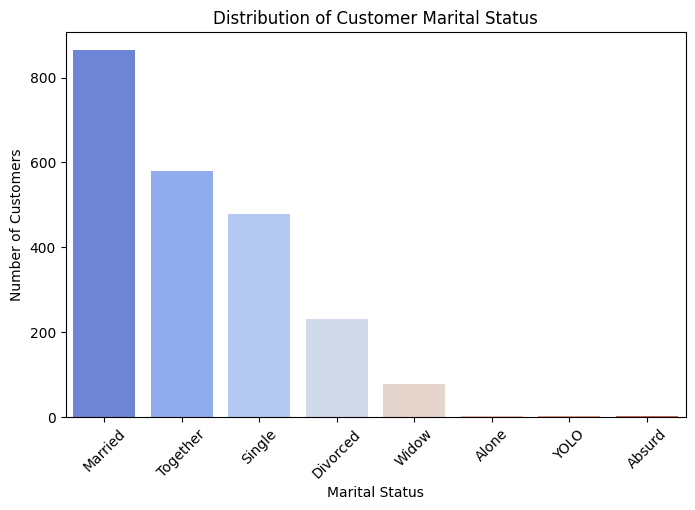

In [ ]:
# Count unique values for Marital Status
marital_status_counts = df['Marital_Status'].value_counts()
print("Marital Status Counts:\n", marital_status_counts)

# Bar plot for Marital Status
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Marital_Status', palette='coolwarm', order=marital_status_counts.index)
plt.title("Distribution of Customer Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate descriptive statistics for each numerical column
numerical_columns = [
    'Age', 'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'Response', 'Complain'
]

# Create a DataFrame to store the calculated statistics
statistics_df = pd.DataFrame({
    'Mean': df[numerical_columns].mean(),
    'Median': df[numerical_columns].median(),
    'Mode': df[numerical_columns].mode().iloc[0],
    'Minimum': df[numerical_columns].min(),
    'Maximum': df[numerical_columns].max(),
    'Variance': df[numerical_columns].var(),
    'Standard Deviation': df[numerical_columns].std()
})

# Display the statistics table
print(statistics_df)

                             Mean   Median    Mode  Minimum   Maximum  \
Age                     54.098346     53.0    47.0     27.0      83.0   
Income               52204.331160  51315.0  7500.0   1730.0  666666.0   
Kidhome                  0.444345      0.0     0.0      0.0       2.0   
Teenhome                 0.506482      0.0     0.0      0.0       2.0   
Recency                 49.104604     49.0    56.0      0.0      99.0   
MntWines               303.995530    174.0     2.0      0.0    1493.0   
MntFruits               26.270451      8.0     0.0      0.0     199.0   
MntMeatProducts        166.916853     67.0     7.0      0.0    1725.0   
MntFishProducts         37.523022     12.0     0.0      0.0     259.0   
MntSweetProducts        27.068842      8.0     0.0      0.0     263.0   
MntGoldProds            43.968708     24.0     1.0      0.0     362.0   
NumDealsPurchases        2.326777      2.0     1.0      0.0      15.0   
NumWebPurchases          4.087170      4.0     2.0 

# **Detailed Report on Missing Value Handling and Data Type Consistency**

***Missing Values in the Income Column***

**Initial Exploration:**

The Income column had 24 missing values, which were identified using df.isnull().sum(). To understand the distribution of Income, I visualized the data using histograms and boxplots, marking the central tendencies (mean, median, and mode).

**Imputation Strategy:**

Instead of filling the missing values with a generic central tendency value (like mean or median), I used a calculated imputation approach:

**Formula Used:**

Each missing Income value was filled by calculating:
Total Purchase Amount/Mean Purchase Income Ratio.

This method helped ensure that the filled values were consistent with other spending habits of each customer, preserving the natural variability.

**Post-Imputation Visualization:**

After filling the missing values, I visualized the Income column again using a histogram. The distribution showed minimal shifts in mean and median, which confirmed that the imputation method maintained the overall data distribution without introducing any significant bias.

***Data Type Consistency Checks and Adjustments***

**Date of Birth (Year_Birth):**

The Year_Birth column initially contained only the birth year as an integer. I converted it to datetime format using pd.to_datetime(df['Year_Birth'], format='%Y').

**Customer Registration Date (Dt_Customer):**

Some rows in Dt_Customer had placeholder values (########), indicating missing data. I replaced these values with NaT to represent missing dates. Then, I converted the column to datetime format using pd.to_datetime(df['Dt_Customer'], errors='coerce').

**Duplicated Data:**

I checked for duplicated rows using df.duplicated().sum() and found no duplicates, so no further action was required for deduplication.

**Calculated Age:**

I derived an Age column by subtracting Year_Birth from the current year (2023), converting the column to numeric. This calculation allowed easier analysis of age as a demographic factor.

**Outlier Detection in Age**

Upon reviewing the age distribution (df['Age'].describe()), I found three customers with ages over 100, which seemed implausible. I removed these rows to maintain data integrity.

# **Summary of Calculated Statistics and Visualizations for Demographic Analysis**

**Age Distribution Visualization**

Histogram and Boxplot: To visualize the distribution of Age, I used a histogram with a KDE (kernel density estimate) overlay and a boxplot. This provided a clear view of the age spread, central tendencies, and any potential outliers.

**Demographic Insights**

**Education:**

I counted unique values in the Education column (df['Education'].value_counts()) and visualized the distribution using a bar plot to observe the educational background of the customer base.

Additionally, I grouped the total purchase amount by education level (Total_purchase_by_education = df1.groupby('Education')['Total_Purchase_Amount'].sum())

and visualized this distribution with a pie chart. This visualization provided insights into how educational backgrounds might influence spending.

**Marital Status:**

I analyzed the Marital_Status column by counting each category’s occurrences (df['Marital_Status'].value_counts()),

followed by a bar plot visualization. This helped in understanding the distribution of marital statuses within the customer demographic, providing potential avenues for targeted marketing.

**Descriptive Statistics for Key Numerical Variables**

I calculated key descriptive statistics for each numerical variable, covering measures of central tendency (mean, median, mode) and measures of dispersion (variance and standard deviation).

This summary helped in quickly identifying the central value, variability, and range of each numerical attribute.

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [ ]:
# List of selected numerical columns
key_variables = [
    'Age', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
]

# Calculate central tendency and dispersion statistics
descriptive_stats = pd.DataFrame({
    'Mean': df[key_variables].mean(),
    'Median': df[key_variables].median(),
    'Mode': df[key_variables].mode().iloc[0],  # Select the first mode value if multiple modes exist
    'Variance': df[key_variables].var(),
    'Standard Deviation': df[key_variables].std()
})

# Display the calculated statistics
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
                              Mean   Median    Mode      Variance  \
Age                     54.098346     53.0    47.0  1.369349e+02   
Income               52204.331160  51315.0  7500.0  6.574422e+08   
MntWines               303.995530    174.0     2.0  1.132823e+05   
MntFruits               26.270451      8.0     0.0  1.577358e+03   
MntMeatProducts        166.916853     67.0     7.0  5.092296e+04   
MntFishProducts         37.523022     12.0     0.0  2.985520e+03   
MntSweetProducts        27.068842      8.0     0.0  1.705190e+03   
MntGoldProds            43.968708     24.0     1.0  2.709652e+03   
NumDealsPurchases        2.326777      2.0     1.0  3.736192e+00   
NumWebPurchases          4.087170      4.0     2.0  7.725403e+00   
NumCatalogPurchases      2.662494      2.0     0.0  8.546594e+00   
NumStorePurchases        5.794367      5.0     3.0  1.056861e+01   

                     Standard Deviation  
Age                           11.701917  
Income

In [ ]:
from scipy.stats import zscore

# Compute Z-scores for key variables
z_scores = df[key_variables].apply(zscore)

# Identify outliers (absolute Z-score > 3)
outliers = (z_scores.abs() > 3)
outliers_summary = outliers.sum()  # Count of outliers for each variable
print("Outliers Summary:\n", outliers_summary)


Outliers Summary:
 Age                     0
Income                 11
MntWines               16
MntFruits              64
MntMeatProducts        37
MntFishProducts        58
MntSweetProducts       62
MntGoldProds           43
NumDealsPurchases      32
NumWebPurchases         4
NumCatalogPurchases     4
NumStorePurchases       0
dtype: int64


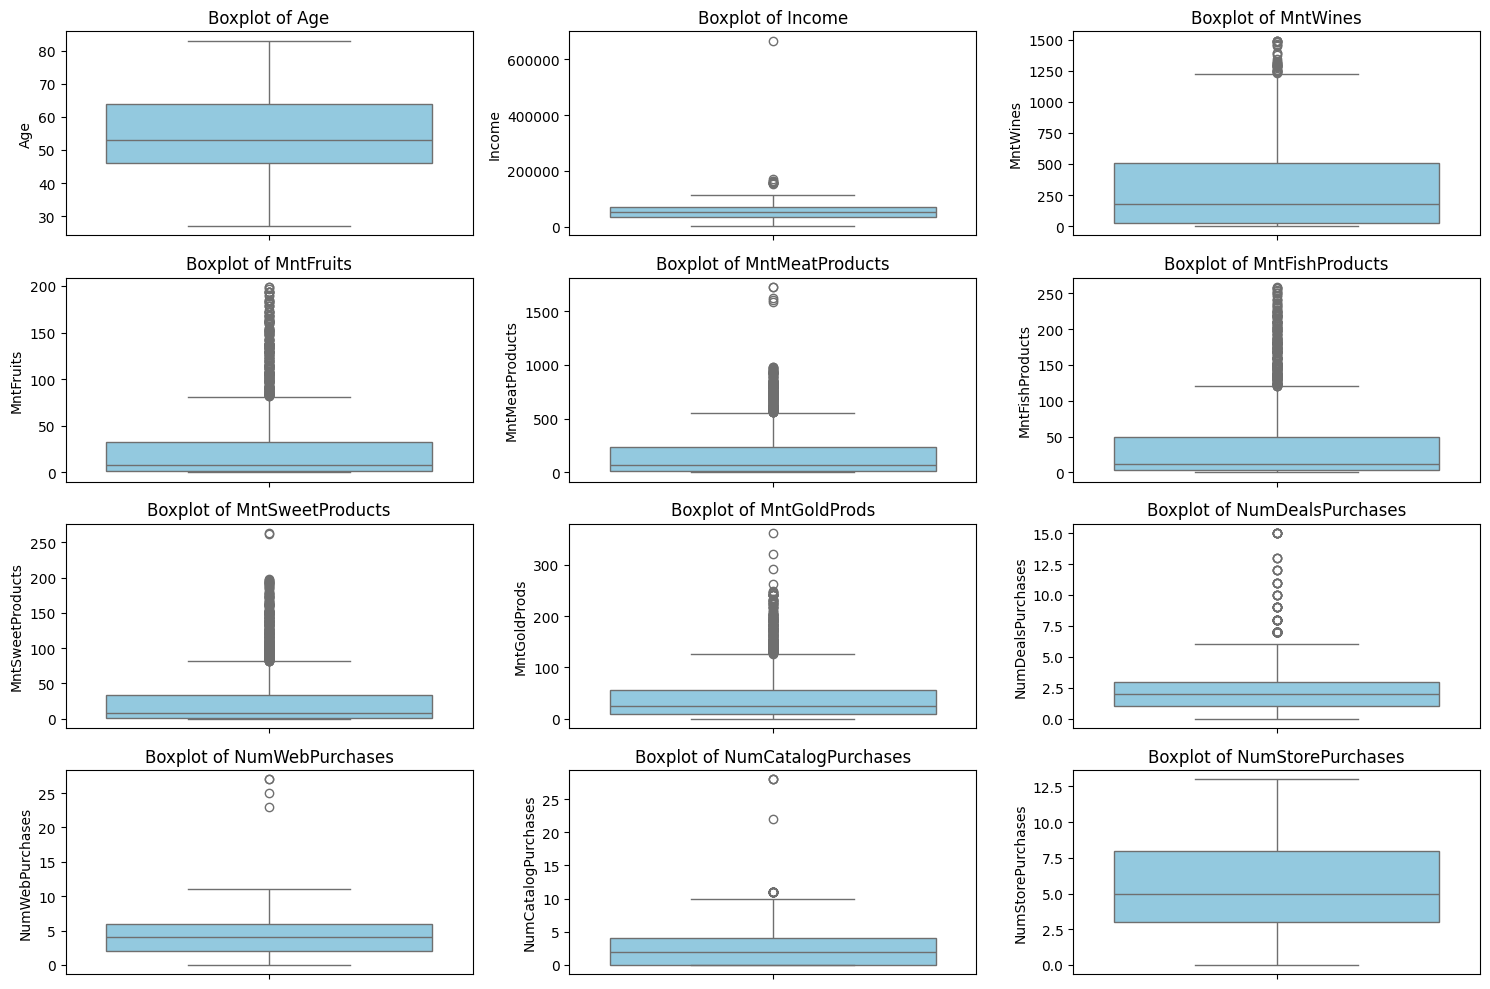

In [ ]:
# Plot boxplots for each key variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(key_variables, 1):
    plt.subplot(4, 3, i)  # Adjust layout for number of variables
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Here the outliers in each variable other than Age involves a potent customers which is buying extreamly more than the average customers in the datsets.
Removing these potent customers from the data would leads to loss of highly spenders and most frequent customers. so, instead of removing these outliers, we should lebelled them as high spenders and most frequent customers.

Note- While using probability distributions we will treat the outliers to not impact the probablities.

In [ ]:
# Define percentiles for labeling
high_spender_thresholds = {}
frequent_buyer_thresholds = {}

# Set high spender thresholds for Mnt (spending) columns
mnt_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for col in mnt_columns:
    high_spender_thresholds[col] = df[col].quantile(0.95)
    df[f"{col}_HighSpender"] = df[col] > high_spender_thresholds[col]

# Set frequent buyer thresholds for Num (purchase frequency) columns
num_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
for col in num_columns:
    frequent_buyer_thresholds[col] = df[col].quantile(0.95)
    df[f"{col}_FrequentBuyer"] = df[col] > frequent_buyer_thresholds[col]

# Display high spender and frequent buyer labels
print(df[[f"{col}_HighSpender" for col in mnt_columns] + [f"{col}_FrequentBuyer" for col in num_columns]].head())


   MntWines_HighSpender  MntFruits_HighSpender  MntMeatProducts_HighSpender  \
0                 False                  False                        False   
1                 False                  False                        False   
2                 False                  False                        False   
3                 False                  False                        False   
4                 False                  False                        False   

   MntFishProducts_HighSpender  MntSweetProducts_HighSpender  \
0                        False                          True   
1                        False                         False   
2                        False                         False   
3                        False                         False   
4                        False                         False   

   MntGoldProds_HighSpender  NumDealsPurchases_FrequentBuyer  \
0                      True                            False   
1           

In [ ]:
# Create summary counts for high spenders and frequent buyers
summary_data = {}

# Count high spenders for each spending (Mnt) category
for col in mnt_columns:
    summary_data[f"{col}_HighSpender"] = df[f"{col}_HighSpender"].sum()

# Count frequent buyers for each purchase frequency (Num) category
for col in num_columns:
    summary_data[f"{col}_FrequentBuyer"] = df[f"{col}_FrequentBuyer"].sum()

# Convert summary data to DataFrame for display
summary_df = pd.DataFrame.from_dict(summary_data, orient='index', columns=['High Value Customers Count'])
print("Summary of High Spenders and Frequent Buyers:\n")
print(summary_df)


Summary of High Spenders and Frequent Buyers:

                                   High Value Customers Count
MntWines_HighSpender                                      111
MntFruits_HighSpender                                     112
MntMeatProducts_HighSpender                               112
MntFishProducts_HighSpender                               112
MntSweetProducts_HighSpender                              110
MntGoldProds_HighSpender                                  112
NumDealsPurchases_FrequentBuyer                            86
NumWebPurchases_FrequentBuyer                              91
NumCatalogPurchases_FrequentBuyer                          71
NumStorePurchases_FrequentBuyer                            83


<Figure size 1000x600 with 0 Axes>

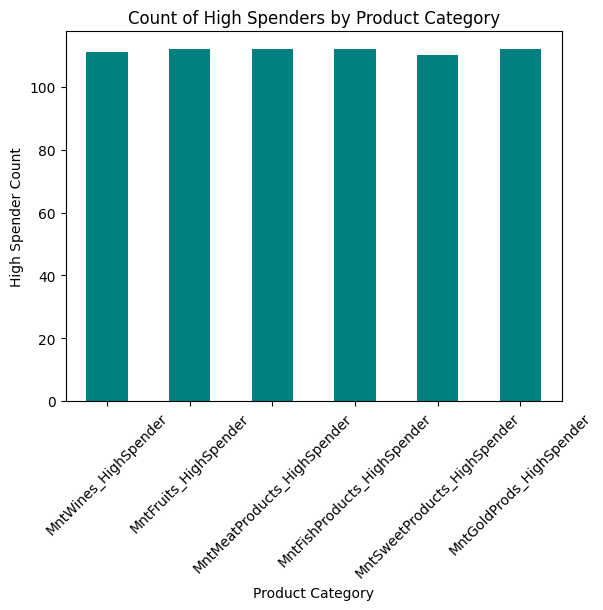

<Figure size 1000x600 with 0 Axes>

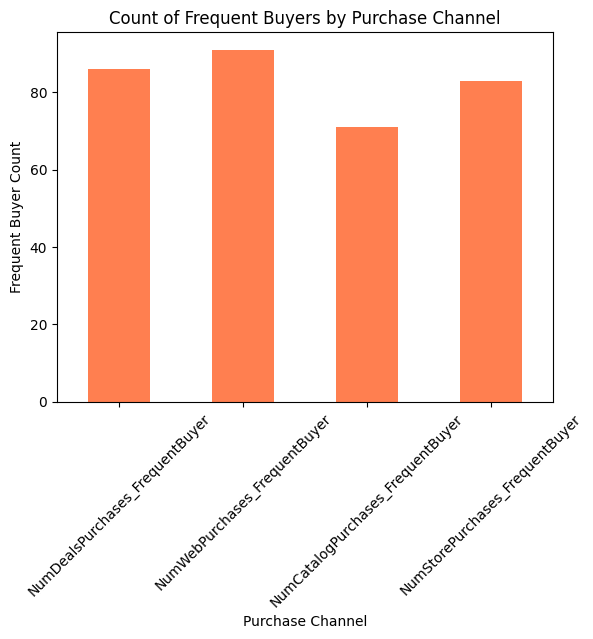

In [ ]:
# Bar plot for High Spender counts
plt.figure(figsize=(10, 6))
summary_df.loc[[col + '_HighSpender' for col in mnt_columns]].plot(kind='bar', color='teal', legend=None)
plt.title("Count of High Spenders by Product Category")
plt.xlabel("Product Category")
plt.ylabel("High Spender Count")
plt.xticks(rotation=45)
plt.show()

# Bar plot for Frequent Buyer counts
plt.figure(figsize=(10, 6))
summary_df.loc[[col + '_FrequentBuyer' for col in num_columns]].plot(kind='bar', color='coral', legend=None)
plt.title("Count of Frequent Buyers by Purchase Channel")
plt.xlabel("Purchase Channel")
plt.ylabel("Frequent Buyer Count")
plt.xticks(rotation=45)
plt.show()


# **Calculation of Descriptive Statistics**

For each key numerical variable (e.g., Age, Income, MntWines, MntMeatProducts, etc.), i calculated the following:

Mean: Average value, providing a sense of the general tendency.

Median: Middle value, useful in understanding the center of data, especially in skewed distributions.

Mode: Most common value, helpful in identifying frequently occurring values.

Variance and Standard Deviation: Indicators of data spread, showing the degree of variability in customer behavior.

These statistics were compiled into a summary table, offering a quick reference for each variable's central tendencies and variability, aiding stakeholders in identifying typical customer profiles.

**Outlier Analysis and Treatment Strategy**

Identification of Outliers:

Outliers were identified using the Z-score method, with values above 3 standard deviations flagged as outliers. A significant number of outliers were found in:

Spending Variables (MntWines, MntFruits, etc.):

These variables contain high values likely representing valuable customers who spend significantly more than average.

Purchase Frequency Variables (NumDealsPurchases, NumWebPurchases, etc.):

High values in these columns indicate frequent buyers who engage more with the brand across different channels.

**Treatment Approach:**

For variables like Age, where outliers (e.g., ages above 100) were implausible, these extreme values were removed.

For spending and frequency variables, outliers were not removed but instead labeled, as they likely represent high-value customers essential for targeted marketing.

These outliers were tagged as High Spenders and Frequent Buyers, supporting customer segmentation efforts without losing valuable data.
High Spender and Frequent Buyer Labels

Customers falling above the 95th percentile in spending or frequency were labeled accordingly:

High Spenders: Top customers based on spending in categories like MntWines, MntMeatProducts, and MntGoldProds.

Frequent Buyers: Top customers based on frequency of purchases across channels (e.g., NumWebPurchases, NumCatalogPurchases).

These labels help stakeholders easily identify valuable customers, facilitating targeted marketing campaigns, personalized offers, and loyalty programs for high-value segments.

**Visualizations for Enhanced Insights**

Boxplots and histograms were used to visualize distributions before and after identifying outliers, highlighting where high-value customers fall on the spending spectrum.

Summary bar charts were generated to display the counts of high spenders and frequent buyers in each category, making it easy for stakeholders to see where customer engagement is strongest.


## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

In [ ]:
# Checking the unique values of complain and response columns.
print("The values in Complain Column is",df['Complain'].unique())
print("The values in Response Column is",df['Response'].unique())

The values in Complain Column is [0 1]
The values in Response Column is [1 0]


In [ ]:
from scipy import stats
# Defining a function for getting the probablity on the basis of bernoulli analysis.
def bernoulli_analysis(column, column_name):
    """
    Perform Bernoulli distribution analysis on a binary column.
    Args:
        column: Binary pandas Series (values 0 or 1).
        column_name: String, name of the column being analyzed.
    """
    prob = column.mean()  # Probability of success (value = 1)
    prob_success = stats.bernoulli.pmf(1, prob)  # PMF for success
    expected_value = prob  # Expected value (same as prob for Bernoulli)

    print(f"--- {column_name} Analysis ---")
    print(f"Probability of {column_name} = 1 (success): {prob_success:.4f}")
    print(f"Expected value (mean) for {column_name}: {expected_value:.4f}\n")

# Apply to Response and Complain columns
bernoulli_analysis(df['Response'], "Response")
bernoulli_analysis(df['Complain'], "Complain")


--- Response Analysis ---
Probability of Response = 1 (success): 0.1493
Expected value (mean) for Response: 0.1493

--- Complain Analysis ---
Probability of Complain = 1 (success): 0.0089
Expected value (mean) for Complain: 0.0089



In [ ]:
# List of columns that start with "Num"
num_columns = ['NumDealsPurchases','NumCatalogPurchases','NumStorePurchases','NumWebPurchases','NumWebVisitsMonth']

In [ ]:
# Removing outliers from num_columns
for col in num_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"Outliers removed from {col}")
print(f"Number of rows after removing outliers: {df.shape[0]}")



Outliers removed from NumDealsPurchases
Outliers removed from NumCatalogPurchases
Outliers removed from NumStorePurchases
Outliers removed from NumWebPurchases
Outliers removed from NumWebVisitsMonth
Number of rows after removing outliers: 2123


In [ ]:
# Analyze each column
for col in num_columns:
    print(f"--- Analysis of {col} ---")

    # Calculate mean and variance
    mean_value = df[col].mean()
    variance_value = df[col].var()
    print(f"Mean: {mean_value:.2f}, Variance: {variance_value:.2f}")

    # Check for Poisson distribution (mean ≈ variance)
    if abs(mean_value - variance_value) < 0.1 * mean_value:  # Allow 10% tolerance
        print(f"{col} appears to follow a Poisson distribution.")
        # Calculate Poisson probabilities (P(X = 5))
        # Define k here to be used in Poisson calculations
        k = 5
        poisson_prob = stats.poisson.pmf(k, mean_value)
        print(f"Probability of {col} = {k}: {poisson_prob:.4f}")
    else:
        print(f"{col} does not strongly align with Poisson assumptions.")
        # Assuming max value is the number of trials (n)
        n = df[col].max()
        if n > 0:
            p = mean_value / n
            print(f"Assuming Binomial: n = {n}, p = {p:.4f}")
            # Probability of X = 5 successes in n trials
            # Define k here to be used in Binomial calculations
            k = 5
            binomial_prob = stats.binom.pmf(k, n, p)
            print(f"Probability of {col} = {k} (Binomial): {binomial_prob:.4f}")

    # Expected value (for both Poisson and Binomial)
    print(f"Expected value (mean) for {col}: {mean_value:.2f}")

    print("\n")

--- Analysis of NumDealsPurchases ---
Mean: 2.08, Variance: 1.86
NumDealsPurchases does not strongly align with Poisson assumptions.
Assuming Binomial: n = 6, p = 0.3469
Probability of NumDealsPurchases = 5 (Binomial): 0.0197
Expected value (mean) for NumDealsPurchases: 2.08


--- Analysis of NumCatalogPurchases ---
Mean: 2.55, Variance: 7.13
NumCatalogPurchases does not strongly align with Poisson assumptions.
Assuming Binomial: n = 10, p = 0.2553
Probability of NumCatalogPurchases = 5 (Binomial): 0.0626
Expected value (mean) for NumCatalogPurchases: 2.55


--- Analysis of NumStorePurchases ---
Mean: 5.78, Variance: 10.57
NumStorePurchases does not strongly align with Poisson assumptions.
Assuming Binomial: n = 13, p = 0.4443
Probability of NumStorePurchases = 5 (Binomial): 0.2026
Expected value (mean) for NumStorePurchases: 5.78


--- Analysis of NumWebPurchases ---
Mean: 3.98, Variance: 6.72
NumWebPurchases does not strongly align with Poisson assumptions.
Assuming Binomial: n = 11,

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

In [ ]:
df['Total_purchase']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

**Relationships between customer characteristics and spending habits**

In [ ]:
# Relationships between customer characteristics and spending habits
corr_Cust_spending = df[['Age','Income','Kidhome','Teenhome','Recency','Total_purchase','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].corr()
print(corr_Cust_spending)

                          Age    Income   Kidhome  Teenhome   Recency  \
Age                  1.000000  0.160916 -0.252620  0.369754  0.019674   
Income               0.160916  1.000000 -0.446640  0.018460 -0.000229   
Kidhome             -0.252620 -0.446640  1.000000 -0.072765  0.006761   
Teenhome             0.369754  0.018460 -0.072765  1.000000  0.013989   
Recency              0.019674 -0.000229  0.006761  0.013989  1.000000   
Total_purchase       0.115751  0.669783 -0.575856 -0.146037  0.020767   
MntWines             0.159767  0.588086 -0.523327 -0.007768  0.017091   
MntFruits            0.018449  0.442239 -0.376822 -0.175442 -0.002229   
MntMeatProducts      0.042875  0.588283 -0.460079 -0.269383  0.022033   
MntFishProducts      0.046944  0.452164 -0.394559 -0.208520  0.003235   
MntSweetProducts     0.020454  0.447009 -0.388514 -0.162444  0.028974   
MntGoldProds         0.050653  0.355375 -0.377447 -0.041589  0.014334   
NumDealsPurchases    0.078296 -0.143925  0.179051  

**Segment customers based on their behaviors and characteristics.**

In [ ]:
# Categorizing customers based on income levels
df['Income_Segment'] = pd.cut(df['Income'],
                              bins=[0, 30000, 70000, 120000, df['Income'].max()],
                              labels=['Low', 'Mid', 'High', 'Very High'])

# Categorizing customers based on spending habits
df['Spending_Segment'] = pd.cut(df['Total_purchase'],
                                bins=[0, 500, 1000, 2000, df['Total_purchase'].max()],
                                labels=['Low Spender', 'Moderate Spender', 'High Spender', 'Very High Spender'])

# Group customers by Income and Spending
segment_summary = df.groupby(['Income_Segment', 'Spending_Segment']).agg({
    'Income': ['mean', 'median'],
    'Total_purchase': ['mean', 'median'],
    'NumWebPurchases': 'mean',
    'NumStorePurchases': 'mean',
    'NumCatalogPurchases': 'mean',
    'NumWebVisitsMonth': 'mean'
}).reset_index()

print(segment_summary)


   Income_Segment   Spending_Segment         Income                 \
                                               mean         median   
0             Low        Low Spender   21529.229067   22675.500000   
1             Low   Moderate Spender   22507.000000   22507.000000   
2             Low       High Spender            NaN            NaN   
3             Low  Very High Spender            NaN            NaN   
4             Mid        Low Spender   43403.167444   42192.000000   
5             Mid   Moderate Spender   58601.791667   60122.500000   
6             Mid       High Spender   62973.891429   64140.000000   
7             Mid  Very High Spender   68233.250000   68144.500000   
8            High        Low Spender   71650.333333   71083.000000   
9            High   Moderate Spender   77298.075019   76624.000000   
10           High       High Spender   79431.134714   78642.000000   
11           High  Very High Spender   84072.545455   82329.000000   
12      Very High   

Key Insights and Customer Segment Analysis
1. Relationships Between Variables

Income and Spending:

Strong positive correlation with total purchases (r=0.67). Higher-income customers spend significantly more.

Income and Purchase Channels:

Catalog purchases (r=0.59) and store purchases (r=0.55) are preferred by high-income groups.
Web visits are negatively correlated with total purchases (r=−0.52), indicating frequent visitors may not always be heavy spenders.

Family Size Impact:

Families with more children (Kidhome:r=−0.58) spend less overall.
Families with teenagers are more price-sensitive, showing a positive correlation with deal purchases (r=0.42).

Age Influence:

Weak correlation with total spending (r=0.12) suggests age has limited predictive value.

2. Customer Segment Insights

Low-Income, Low Spenders:

Average income ($21,529) with minimal purchases ($64).

High web visits (6.91) but low online conversions. Primarily store purchases (2.91 mean).

Middle-Income Segments:

Low Spenders: Moderate spending ($171), mostly in-store (3.95 mean).

High Spenders: Higher engagement across all channels (catalog: 5.19 purchases; store: 8.93).

High-Income Segments:

High Spenders: Balanced purchasing across web, catalog, and stores (catalog: 5.83; web: 5.28; store: 8.47).

Very High-Income, Low Spenders: Low engagement and spending ($48) despite high income, indicating untapped potential.

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

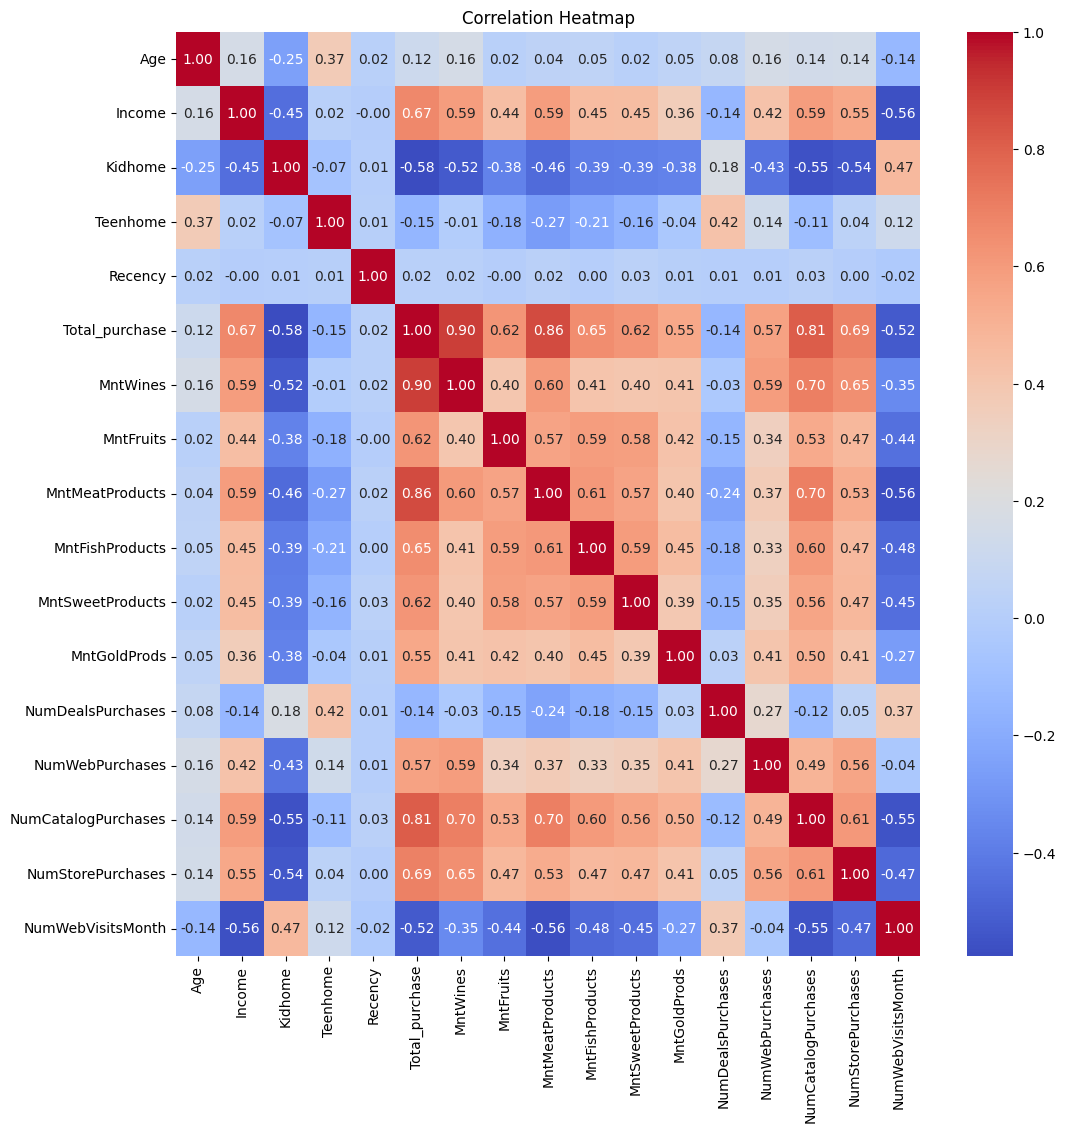

In [ ]:
# Visualizing corr_Cust_spending
plt.figure(figsize=(12, 12))
sns.heatmap(corr_Cust_spending, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

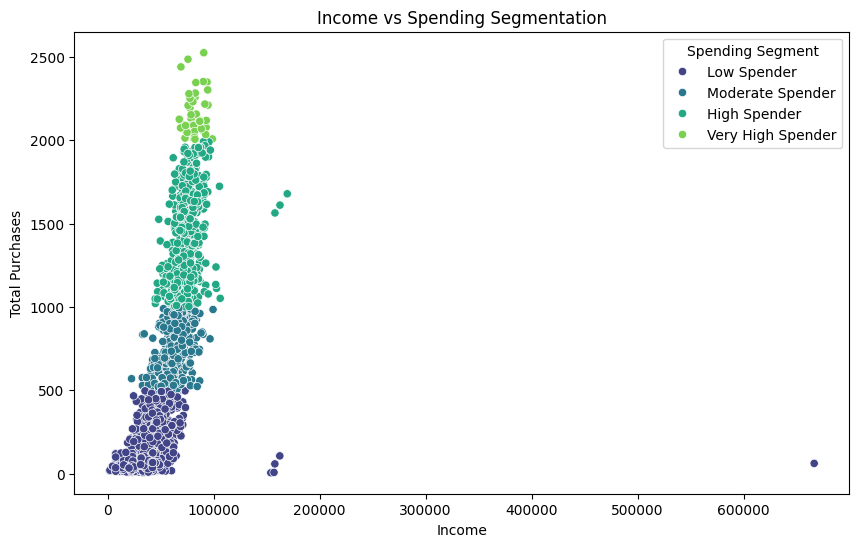

In [ ]:
# Visualize Income and Spending Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Total_purchase', hue='Spending_Segment', palette='viridis')
plt.title("Income vs Spending Segmentation")
plt.xlabel("Income")
plt.ylabel("Total Purchases")
plt.legend(title="Spending Segment")
plt.show()


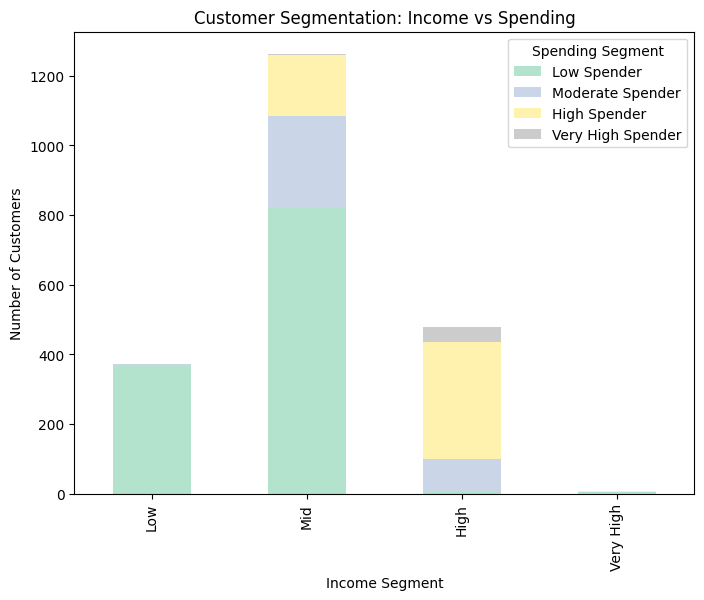

In [ ]:
# Count of customers by Income and Spending Segments
segment_counts = df.groupby(['Income_Segment', 'Spending_Segment']).size().unstack()

# Stacked bar plot
segment_counts.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Pastel2')
plt.title("Customer Segmentation: Income vs Spending")
plt.ylabel("Number of Customers")
plt.xlabel("Income Segment")
plt.legend(title="Spending Segment")
plt.show()


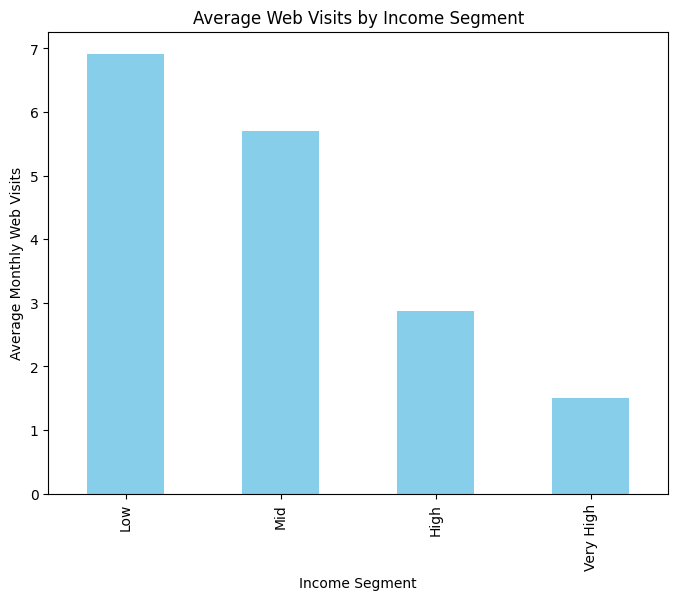

In [ ]:
# Calculate averages for each income group
web_visits_by_income = df.groupby('Income_Segment')['NumWebVisitsMonth'].mean()

# Visualize web visits by income group
plt.figure(figsize=(8, 6))
web_visits_by_income.plot(kind='bar', color='skyblue')
plt.title("Average Web Visits by Income Segment")
plt.xlabel("Income Segment")
plt.ylabel("Average Monthly Web Visits")
plt.show()


# **Key Insights**
1. Income and Spending Segmentation:

Positive Correlation: As income increases, total spending tends to increase.

Spending Segments: The segmentation into low, moderate, high, and very high spenders provides valuable insights for targeted marketing.

Low-Income Segment: This segment might be a potential target for promotions and loyalty programs to encourage increased spending.

High-Income, High-Spend Segment: This segment is crucial to retain. Consider offering exclusive products, premium services, or personalized experiences.

2. Web Visit Behavior:

Income and Web Visits: Lower-income customers tend to visit the website more frequently, possibly due to price comparisons or product research.

Mobile Optimization: Ensure the website is optimized for mobile devices, as lower-income customers may rely more on mobile devices for online shopping.

# **Recommendations**
1. Targeted Marketing:

Personalized Offers: Use customer segmentation to tailor marketing messages and offers to specific groups.

Email Marketing: Implement targeted email campaigns based on customer preferences and purchase history.

Social Media Marketing: Use social media platforms to engage with customers and promote products.

2. Customer Retention:

Loyalty Programs: Offer loyalty programs with tiered rewards to encourage repeat purchases.

Customer Support: Provide excellent customer support to build strong relationships and loyalty.

3. Website Optimization:

User Experience: Prioritize website speed, mobile optimization, and intuitive navigation.

A/B Testing: Continuously test different website layouts and content to optimize user engagement and conversion rates.

Personalized Recommendations: Implement product recommendation systems to suggest relevant products based on customer preferences.

4. Inventory Management:

Demand Forecasting: Use historical data and demand forecasting techniques to optimize inventory levels.

Supply Chain Management: Ensure efficient supply chain operations to avoid stockouts and minimize costs.

5. Pricing Strategy:

Dynamic Pricing: Consider implementing dynamic pricing strategies to optimize revenue.

Price Sensitivity Analysis: Analyze how price changes affect customer demand and revenue.

By leveraging these insights and implementing the recommended strategies, the company can improve customer satisfaction, increase sales, and drive business growth.

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍